#  Unsupervised Learning on Countries Data

# 1. Data exploration

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
!wget -O Country-data.csv "https://drive.google.com/uc?export=download&id=1Fpc65PDVxQJymQ78tdConZ6G9Fl-yj63"
!wget -O data-dictionary.csv "https://drive.google.com/uc?export=download&id=1DgGuxc6xpvnXE7Rv0rrNjKZNKD0aFAT8"

--2020-10-27 10:02:35--  https://drive.google.com/uc?export=download&id=1Fpc65PDVxQJymQ78tdConZ6G9Fl-yj63
Resolving drive.google.com (drive.google.com)... 172.217.19.206, 2a00:1450:400e:808::200e
Connecting to drive.google.com (drive.google.com)|172.217.19.206|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0k-5o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vnchjtpn817llu6ou8m60vae0l720rme/1603789350000/16348994772222974718/*/1Fpc65PDVxQJymQ78tdConZ6G9Fl-yj63?e=download [following]
--2020-10-27 10:02:35--  https://doc-0k-5o-docs.googleusercontent.com/docs/securesc/ha0ro937gcuc7l7deffksulhg5h7mbp1/vnchjtpn817llu6ou8m60vae0l720rme/1603789350000/16348994772222974718/*/1Fpc65PDVxQJymQ78tdConZ6G9Fl-yj63?e=download
Resolving doc-0k-5o-docs.googleusercontent.com (doc-0k-5o-docs.googleusercontent.com)... 172.217.20.65, 2a00:1450:400e:80a::2001
Connecting to doc-0k-5o-docs.googleusercontent.com (doc-0k-5o-docs.g

In [3]:
# Read the dataset
data = pd.read_csv('Country-data.csv')

In [3]:
data.head()

,country,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,Afghanistan,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,Albania,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,Algeria,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,Angola,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,Antigua and Barbuda,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200


In [4]:
data.shape

(167, 10)

In [5]:
data.dtypes

country        object
child_mort    float64
exports       float64
health        float64
imports       float64
income          int64
inflation     float64
life_expec    float64
total_fer     float64
gdpp            int64
dtype: object

In [7]:
data.describe()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
count,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000,167.000000
mean,38.270060,41.108976,6.815689,46.890215,17144.688623,7.781832,70.555689,2.947964,12964.155689
std,40.328931,27.412010,2.746837,24.209589,19278.067698,10.570704,8.893172,1.513848,18328.704809
min,2.600000,0.109000,1.810000,0.065900,609.000000,-4.210000,32.100000,1.150000,231.000000
25%,8.250000,23.800000,4.920000,30.200000,3355.000000,1.810000,65.300000,1.795000,1330.000000
50%,19.300000,35.000000,6.320000,43.300000,9960.000000,5.390000,73.100000,2.410000,4660.000000
75%,62.100000,51.350000,8.600000,58.750000,22800.000000,10.750000,76.800000,3.880000,14050.000000
max,208.000000,200.000000,17.900000,174.000000,125000.000000,104.000000,82.800000,7.490000,105000.000000


Load information about the columns of the dataset.

In [78]:
data_dict = pd.read_csv('data-dictionary.csv')
data_dict.head(10)

,Column Name,Description
0,country,Name of the country
1,child_mort,Death of children under 5 years of age per 100...
2,exports,Exports of goods and services per capita. Give...
3,health,Total health spending per capita. Given as %ag...
4,imports,Imports of goods and services per capita. Give...
5,Income,Net income per person
6,Inflation,The measurement of the annual growth rate of t...
7,life_expec,The average number of years a new born child w...
8,total_fer,The number of children that would be born to e...
9,gdpp,The GDP per capita. Calculated as the Total GD...


First we check whether there are missing values in the dataset.

In [79]:
data.isna().sum(axis=0)

country       0
child_mort    0
exports       0
health        0
imports       0
income        0
inflation     0
life_expec    0
total_fer     0
gdpp          0
dtype: int64

We exclude the "country" column since this is not numeric.

In [9]:
data1 = data.copy().set_index('country')

### Correlation between features

First we plot the correlation between pairs of features.

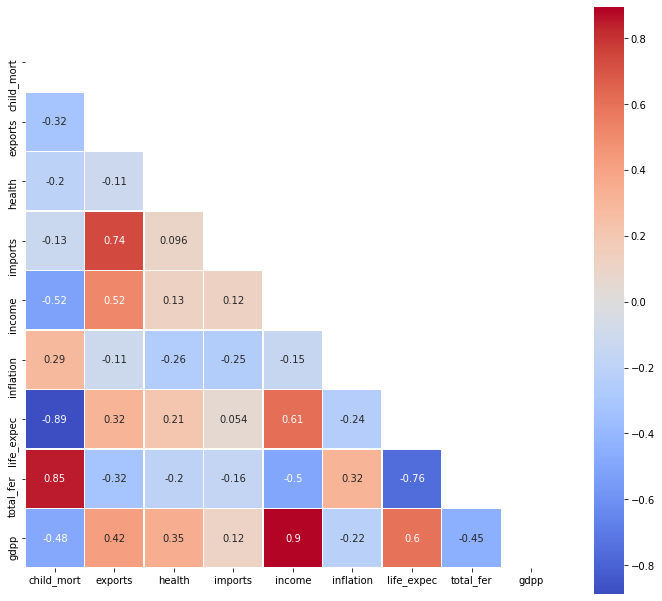

In [10]:
corr = data1.corr()
mask = np.triu(np.ones_like(corr, dtype=np.bool))
f, ax = plt.subplots(figsize=(12, 12))
sns.heatmap(corr, cmap='coolwarm', mask=mask, center=0, square=True, annot=True, 
            linewidths=.5, cbar_kws={"shrink": .9})
plt.show()

We scale the features so that they have a Gaussian distribution.

In [13]:
from sklearn.preprocessing import StandardScaler

In [14]:
data1.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,90.2,10.0,7.58,44.9,1610.0,9.44,56.2,5.82,553.0
Albania,16.6,28.0,6.55,48.6,9930.0,4.49,76.3,1.65,4090.0
Algeria,27.3,38.4,4.17,31.4,12900.0,16.10,76.5,2.89,4460.0
Angola,119.0,62.3,2.85,42.9,5900.0,22.40,60.1,6.16,3530.0
Antigua and Barbuda,10.3,45.5,6.03,58.9,19100.0,1.44,76.8,2.13,12200.0


In [15]:
sc = StandardScaler()
data1_scaled = pd.DataFrame(sc.fit_transform(data1),columns = data1.columns,index=data1.index)
data1_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


Finally, we draw the pairplot of the transformed and scaled features.

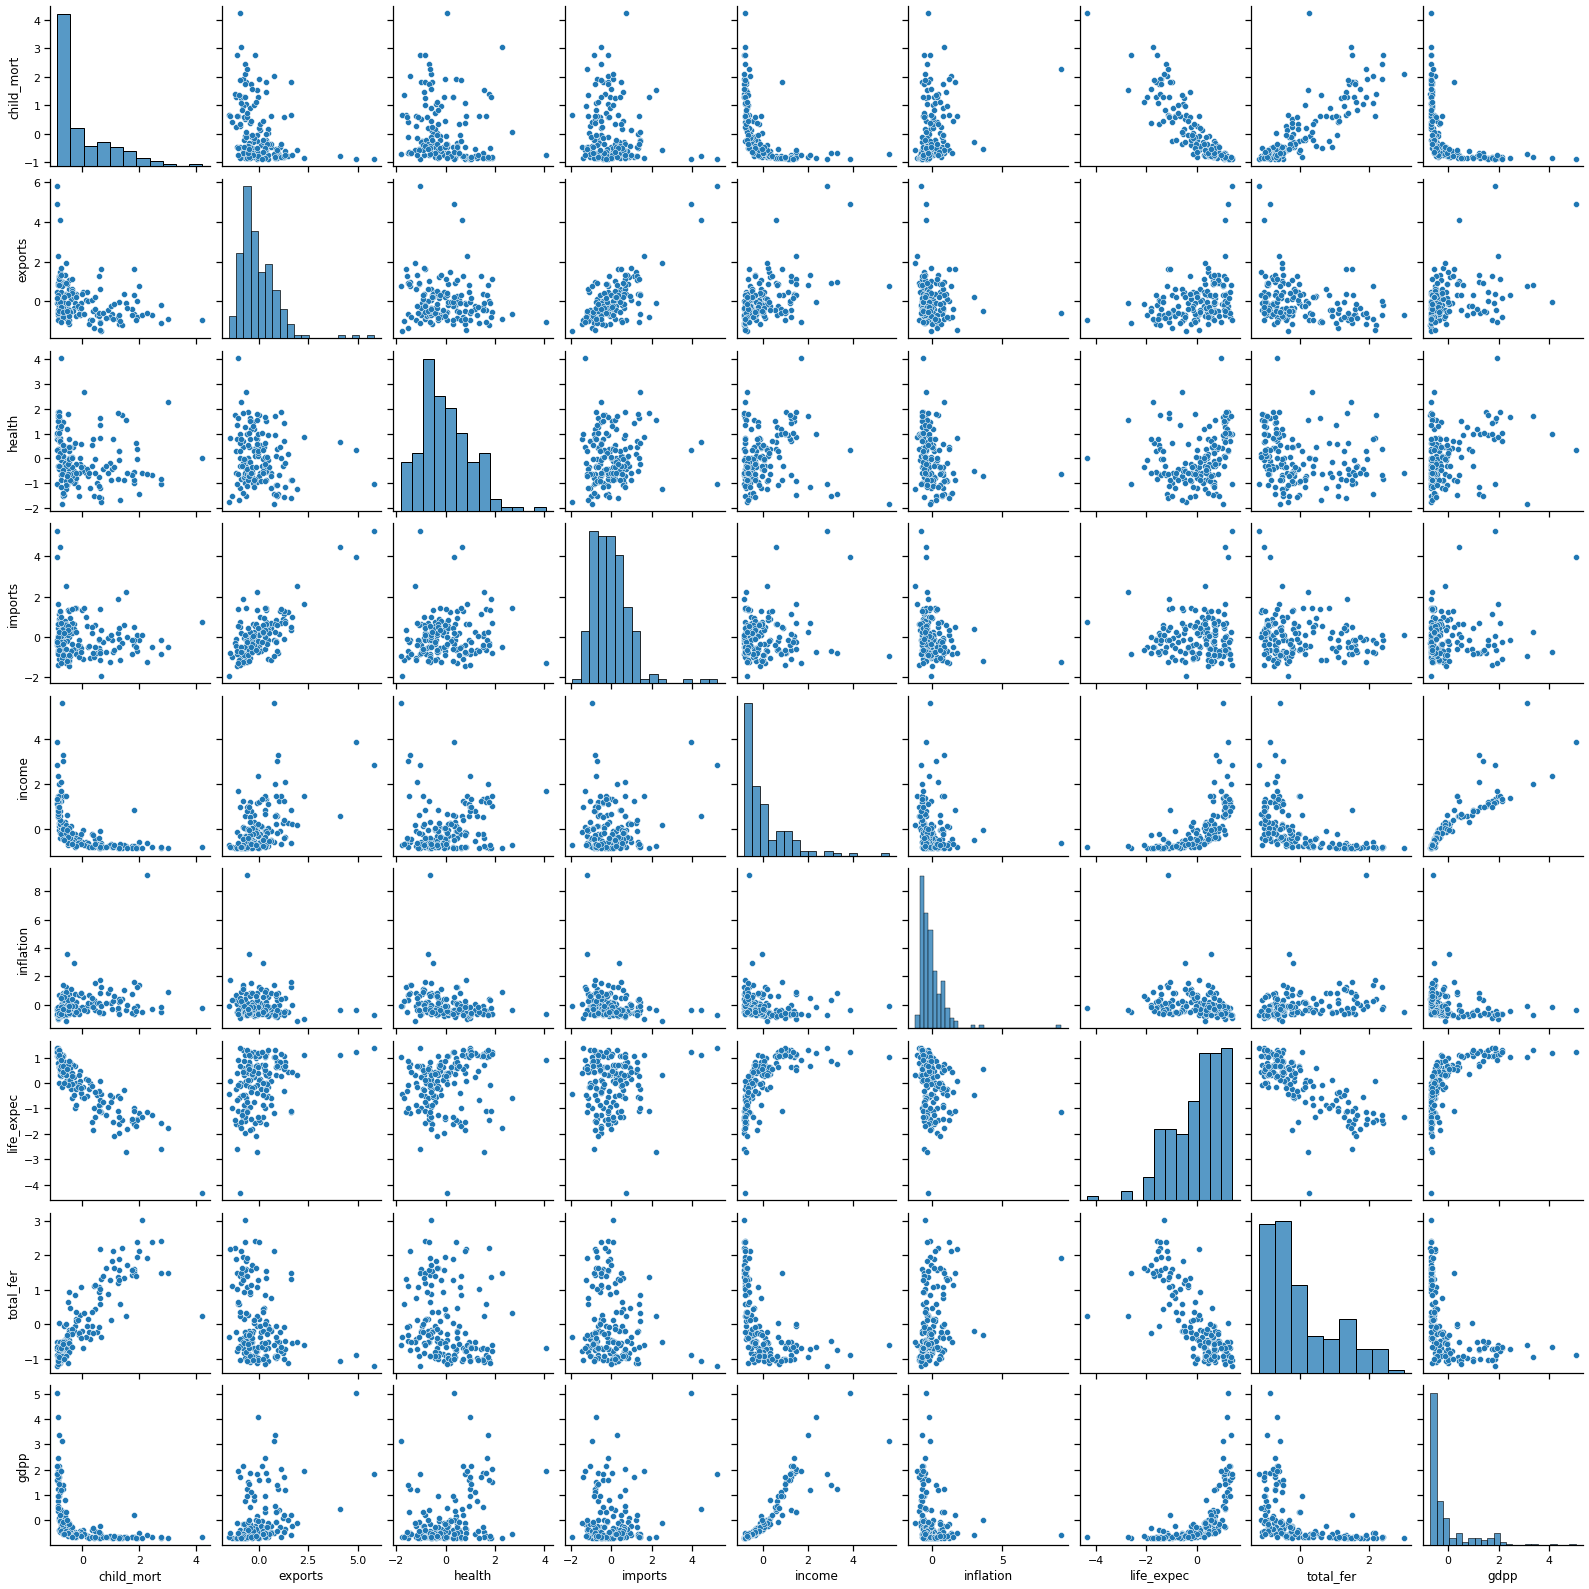

In [16]:
sns.set_context('notebook')
sns.pairplot(data1_scaled)
plt.show()

#### Next we are going to apply three clustering algorithms: K-Means, Hierarchical Agglomerative Clustering and DBSCAN.

# 2. K-Means Clustering

In [17]:
from sklearn.cluster import KMeans

First we compute the **inertia** for 1 to 10 clusters, and plot the inertia as a function of the number of clusters.

In [18]:
inertia = []
list_num_clusters = list(range(1,11))
for num_clusters in list_num_clusters:
    km = KMeans(n_clusters=num_clusters)
    km.fit(data1_scaled)
    inertia.append(km.inertia_)

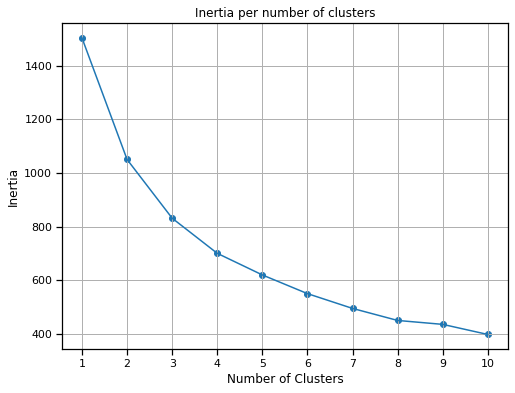

In [19]:
plt.figure(figsize=(8,6))
plt.plot(list_num_clusters, inertia)
plt.scatter(list_num_clusters, inertia)
plt.xlabel('Number of Clusters')
plt.xticks(np.arange(1, 11, step=1))
plt.ylabel('Inertia')
plt.title('Inertia per number of clusters')
plt.grid(True)
plt.show()

In [20]:
diff = [inertia[i]-inertia[i+1] for i in range(len(inertia)-1)]
diff

[452.78544171466933,
 218.7901230766439,
 130.84555477509195,
 80.4685088558357,
 69.66278594537584,
 55.124203037191705,
 44.81161605370454,
 14.584172902636794,
 37.657838368168825]

## We choose $k=3$ clusters
In fact, the difference between inertia values of consecutive values of $k$ becomes smaller for $k \geq 4$.

In [21]:
km3 = KMeans(n_clusters=3, random_state=42)
km3.fit(data1_scaled)
print(km3.cluster_centers_)

[[ 1.36021776 -0.43753313 -0.15598401 -0.18920377 -0.68689408  0.40211078
  -1.28217981  1.36494385 -0.60424243]
 [-0.40645337 -0.03165259 -0.2244709   0.02416161 -0.25177041 -0.01716742
   0.25473362 -0.42434279 -0.35448141]
 [-0.82744866  0.64507985  0.72741122  0.19063895  1.48424268 -0.48492064
   1.07957853 -0.79187687  1.61599536]]


In [22]:
print(km3.labels_)

[0 1 1 0 1 1 1 2 2 1 1 2 1 1 1 2 1 0 1 1 1 0 1 2 1 0 0 1 0 2 1 0 0 1 1 1 0
 0 0 1 0 1 2 2 2 1 1 1 1 0 0 1 1 2 2 0 0 1 2 0 2 1 1 0 0 1 0 1 2 1 1 1 0 2
 2 2 1 2 1 1 0 0 2 1 0 1 1 0 0 1 1 2 1 0 0 1 1 0 2 0 1 1 1 1 1 1 0 1 0 1 2
 2 0 0 2 1 0 1 1 1 1 1 2 2 1 1 0 1 1 0 1 1 0 2 2 2 1 0 2 2 1 1 0 1 2 2 1 0
 1 0 0 1 1 1 1 0 1 2 2 2 1 1 1 1 1 0 0]


In [23]:
pd.Series(km3.labels_).value_counts()

1    84
0    47
2    36
dtype: int64

We add a column to the dataframe containing the predicted cluster.

In [24]:
data_final = data1_scaled.copy()
data_final['Kmeans_cl'] = km3.labels_
data_final.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Kmeans_cl
country,,,,,,,,,,
Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,0
Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,1
Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,1
Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,0
Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,1


In [25]:
Kmeans_cl = pd.DataFrame(data_final, columns = ['Kmeans_cl'])
Kmeans_cl['country'] = data_final.index
Kmeans_cl = Kmeans_cl[['country', 'Kmeans_cl']]
Kmeans_cl.reset_index(drop=True, inplace=True)
Kmeans_cl.head()

,country,Kmeans_cl
0,Afghanistan,0
1,Albania,1
2,Algeria,1
3,Angola,0
4,Antigua and Barbuda,1


## Representing clusters on the world map with Folium

We represent the three clusters of countries on the world map in order to see similarities between countries in the same cluster.

In [26]:
import folium
# Setting up the world countries data URL
url = 'https://raw.githubusercontent.com/python-visualization/folium/master/examples/data'
country_shapes = f'{url}/world-countries.json'

In [27]:
import requests, json
# Reading the country_shapes from a json file
r = requests.get(country_shapes)
dictionary = r.json()

In [28]:
# List of all names of the countries from the json file
all_names = [feat['properties']['name'] for feat in dictionary['features']]

We replace the names of some countries to match the names from the country_shapes file.

In [29]:
Kmeans_cl['country'].iloc[Kmeans_cl.country == "Bahamas"] = 'The Bahamas'
Kmeans_cl['country'].iloc[Kmeans_cl.country == 'United States'] = 'United States of America'
Kmeans_cl['country'].iloc[Kmeans_cl.country == 'Lao'] = 'Laos'
Kmeans_cl['country'].iloc[Kmeans_cl.country == 'Guinea-Bissau'] = 'Guinea Bissau'
Kmeans_cl['country'].iloc[Kmeans_cl.country == 'Tanzania'] = 'United Republic of Tanzania'
Kmeans_cl['country'].iloc[Kmeans_cl.country == 'Macedonia, FYR'] = 'Macedonia'
Kmeans_cl['country'].iloc[Kmeans_cl.country == 'Kyrgyz Republic'] = 'Kyrgyzstan'
Kmeans_cl['country'].iloc[Kmeans_cl.country == 'Congo, Dem. Rep.'] = 'Democratic Republic of the Congo'
Kmeans_cl['country'].iloc[Kmeans_cl.country == 'Congo, Rep.'] = 'Republic of the Congo'
Kmeans_cl['country'].iloc[Kmeans_cl.country == 'Serbia'] = 'Republic of Serbia'
Kmeans_cl['country'].iloc[Kmeans_cl.country == "Cote d'Ivoire"] = 'Ivory Coast'
Kmeans_cl['country'].iloc[Kmeans_cl.country == "Slovak Republic"] = 'Slovakia'
Kmeans_cl['country'].iloc[Kmeans_cl.country == "Timor-Leste"] = 'East Timor'

/home/antonello/.local/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


List of countries in our dataset which are not in the country_shapes file.

In [30]:
set(Kmeans_cl.country.values) - set(all_names)

{'Antigua and Barbuda',
 'Bahrain',
 'Barbados',
 'Cape Verde',
 'Comoros',
 'Grenada',
 'Kiribati',
 'Maldives',
 'Malta',
 'Mauritius',
 'Micronesia, Fed. Sts.',
 'Samoa',
 'Seychelles',
 'Singapore',
 'St. Vincent and the Grenadines',
 'Tonga'}

Notice that all these countries are small islands.

List of countries that do not appear in our dataset.

In [31]:
set(all_names) - set(Kmeans_cl.country.values)

{'Antarctica',
 'Cuba',
 'Djibouti',
 'Ethiopia',
 'Falkland Islands',
 'French Southern and Antarctic Lands',
 'Greenland',
 'Honduras',
 'Kosovo',
 'Mexico',
 'New Caledonia',
 'Nicaragua',
 'North Korea',
 'Northern Cyprus',
 'Papua New Guinea',
 'Puerto Rico',
 'Somalia',
 'Somaliland',
 'South Sudan',
 'Swaziland',
 'Syria',
 'Taiwan',
 'Trinidad and Tobago',
 'West Bank',
 'Western Sahara',
 'Zimbabwe'}

We define a new cluster, with number 3, containing the countries in country_shapes that do not appear in our dataset.

In [32]:
i = Kmeans_cl.shape[0]
for c_name in set(all_names) - set(Kmeans_cl.country.values):
    row = pd.DataFrame({'country': c_name, 'Kmeans_cl': 3}, index = [i])
    i += 1
    Kmeans_cl = Kmeans_cl.append(row)

In [33]:
Kmeans_cl.sort_values(by=['country'], inplace=True)
Kmeans_cl = Kmeans_cl.reset_index(drop=True)
Kmeans_cl.head()

,country,Kmeans_cl
0,Afghanistan,0
1,Albania,1
2,Algeria,1
3,Angola,0
4,Antarctica,3


We check that now all countries from the country_shapes file have been assigned to a cluster.

In [34]:
set(all_names) - set(Kmeans_cl.country.values)

set()

We plot the result on the world map.

In [35]:
import branca.colormap as cm

We define the clusters colors: cluster 0 will be red, cluster 1 blue, cluster 2 green and cluster 3 (countries that are not in the dataset) white.

In [36]:
step = cm.StepColormap(['red','mediumblue','lime','white'], vmin=0, vmax=3, index=[0,0.75,1.5,2.25,3], caption='step')
step

In [37]:
countries_dict = Kmeans_cl.set_index('country')['Kmeans_cl']

In [38]:
m = folium.Map()
folium.GeoJson(
    country_shapes,
    style_function=lambda feature: {
        'fillColor': step(countries_dict[feature['properties']['name']]),
        'color' : 'black',
        'weight' : 1,
        'fillOpacity' : 0.4
        }
    ).add_to(m)
m

From the map we can see some information about the three clusters:

- **cluster 0 (red)** consists of most African countries and some Asian countries, which are probably the countries poorest countries;

- **cluster 1 (blue)** consists of Southamerican countries, Northafrican countries and most Asian countries, which can be considered as developing countries;

- **cluster 2 (green)** of USA, Canada, Australia, Japan, South Korea, Western Europe, Israel, United Arab Emirates, Qatar, Kuwait and French Guyana, which are countries with highest GDP;

- the countries in **white** do not appear in the dataset.

## Pairplots with clusters in different colors

In [39]:
cl_colors = {0: "red", 1: "blue", 2: "green"}

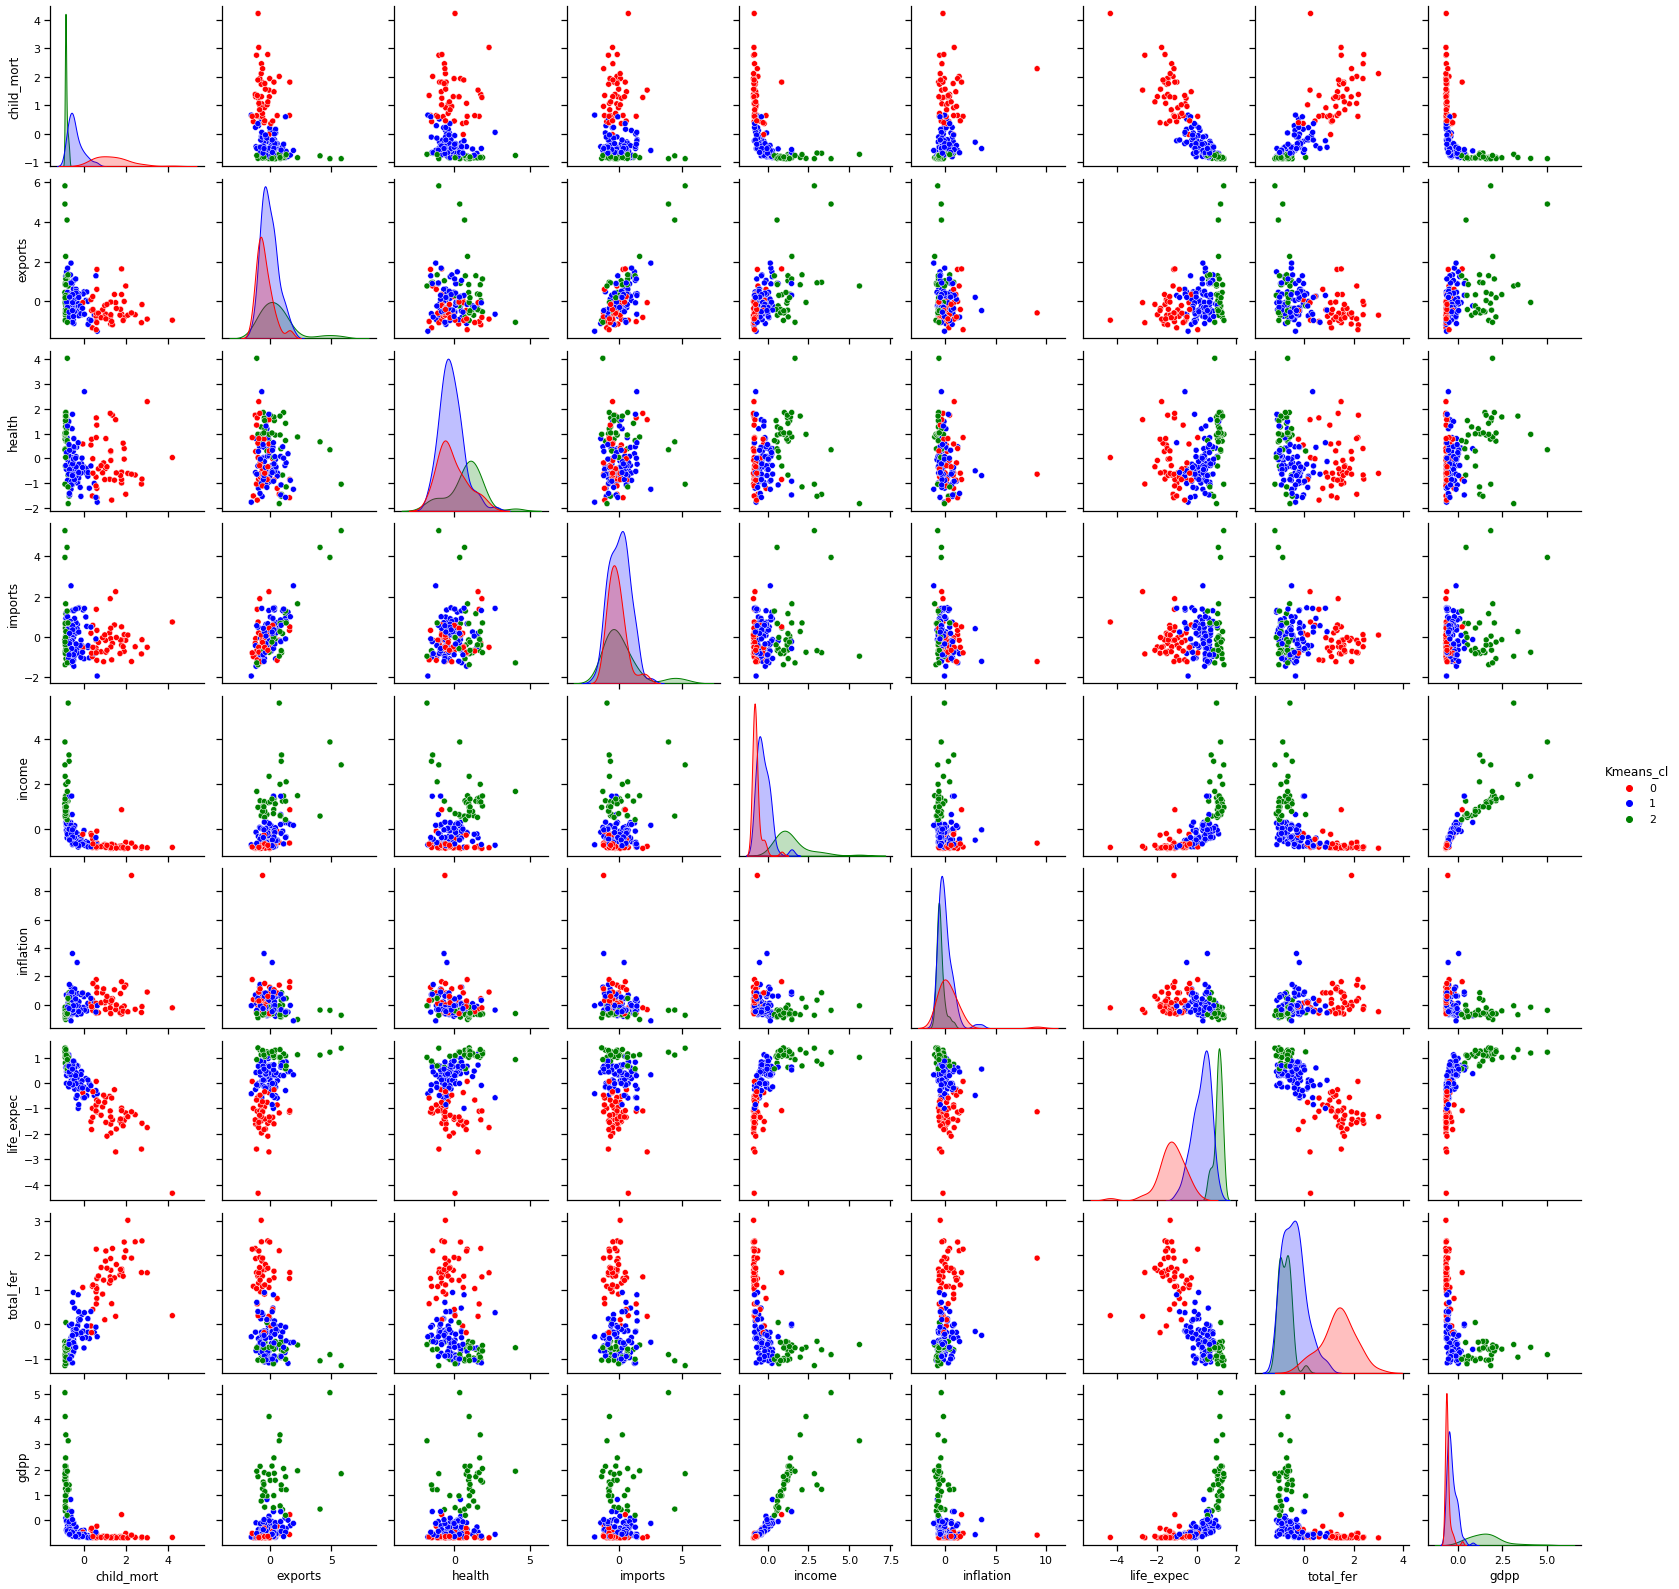

In [41]:
sns.set_context('notebook')
sns.pairplot(data_final, hue = 'Kmeans_cl', palette=cl_colors)

We visualize on a larger plot the 3 clusters for various pairs of features: Child Mortality vs Health, Income VS GDPP, Inflation vs GDPP.

In [42]:
cluster_labels = km3.labels_
categories = np.array(cluster_labels)
colormap = np.array(['r', 'b', 'g'])

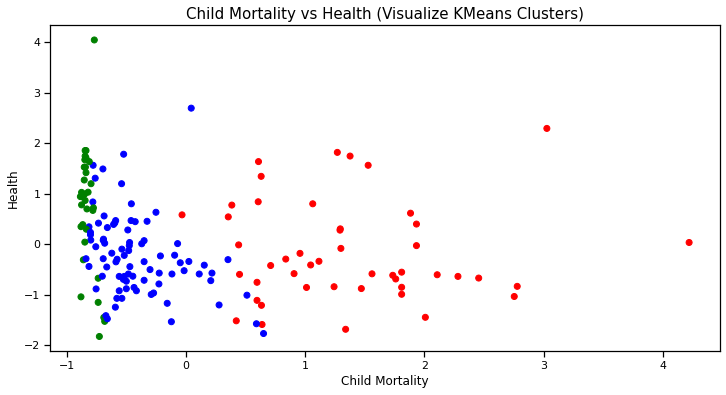

In [43]:
#Visualize clusters: Child Mortality vs Health
plt.figure(figsize=(12,6))
plt.scatter(data1_scaled['child_mort'], data1_scaled['health'], c=colormap[categories]) 
#child mortality vs exports
plt.title("Child Mortality vs Health (Visualize KMeans Clusters)", fontsize=15)
plt.xlabel("Child Mortality", fontsize=12)
plt.ylabel("Health", fontsize=12)
plt.rcParams['axes.facecolor'] = 'white'
plt.show()

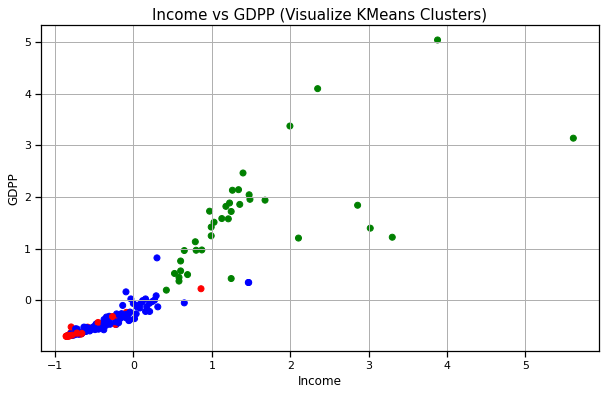

In [105]:
#Visualize clusters: Income VS GDPP
plt.figure(figsize=(10,6))
plt.scatter(data1_scaled['income'], data1_scaled['gdpp'], c=colormap[categories]) # income vs gdpp
plt.title("Income vs GDPP (Visualize KMeans Clusters)", fontsize=15)
plt.xlabel("Income", fontsize=12)
plt.ylabel("GDPP", fontsize=12)
plt.rcParams['axes.facecolor'] = 'white'
plt.show()

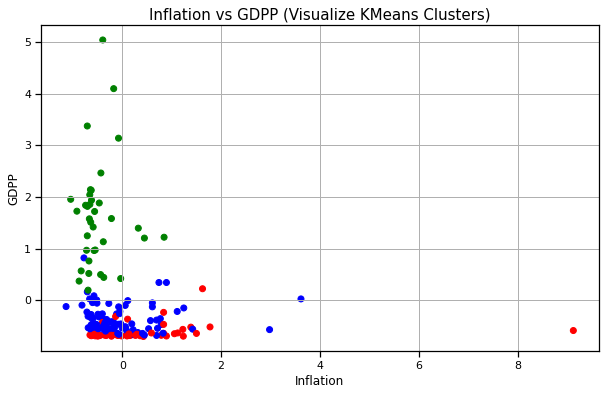

In [106]:
#Visualize clusters: Inflation VS GDPP
plt.figure(figsize=(10,6))
plt.scatter(data1_scaled['inflation'], data1_scaled['gdpp'], c=colormap[categories]) # inflation vs gdpp
plt.title("Inflation vs GDPP (Visualize KMeans Clusters)", fontsize=15)
plt.xlabel("Inflation", fontsize=12)
plt.ylabel("GDPP", fontsize=12)
plt.rcParams['axes.facecolor'] = 'white'
plt.show()

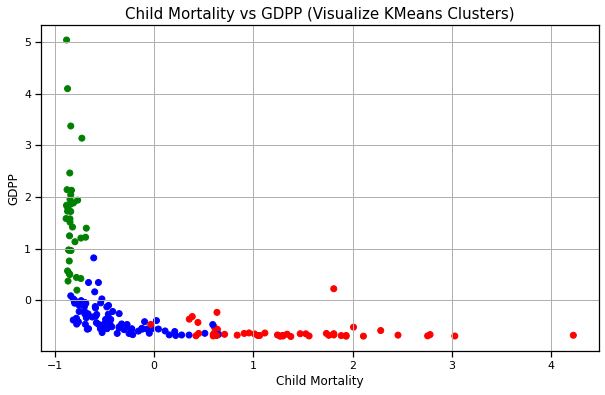

In [107]:
#Visualize clusters: Child Mortality VS GDPP
plt.figure(figsize=(10,6))
plt.scatter(data1_scaled['child_mort'], data1_scaled['gdpp'], c=colormap[categories]) # inflation vs gdpp
plt.title("Child Mortality vs GDPP (Visualize KMeans Clusters)", fontsize=15)
plt.xlabel("Child Mortality", fontsize=12)
plt.ylabel("GDPP", fontsize=12)
plt.rcParams['axes.facecolor'] = 'white'
plt.show()

# 3. Hierarchical Agglomerative Clustering with Ward Linkage

In [46]:
from sklearn.cluster import AgglomerativeClustering

In [47]:
data1_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [48]:
ag = AgglomerativeClustering(n_clusters=3, affinity = 'euclidean', linkage='ward', compute_full_tree=True)
ag_pred = ag.fit_predict(data1_scaled)
data_final['Agglom_cl'] = ag.labels_
data_final.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Kmeans_cl,Agglom_cl
country,,,,,,,,,,,
Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,0,2
Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,1,1
Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,1,1
Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,0,1
Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,1,1


## Dendrogram

In [49]:
import scipy.cluster.hierarchy as sch

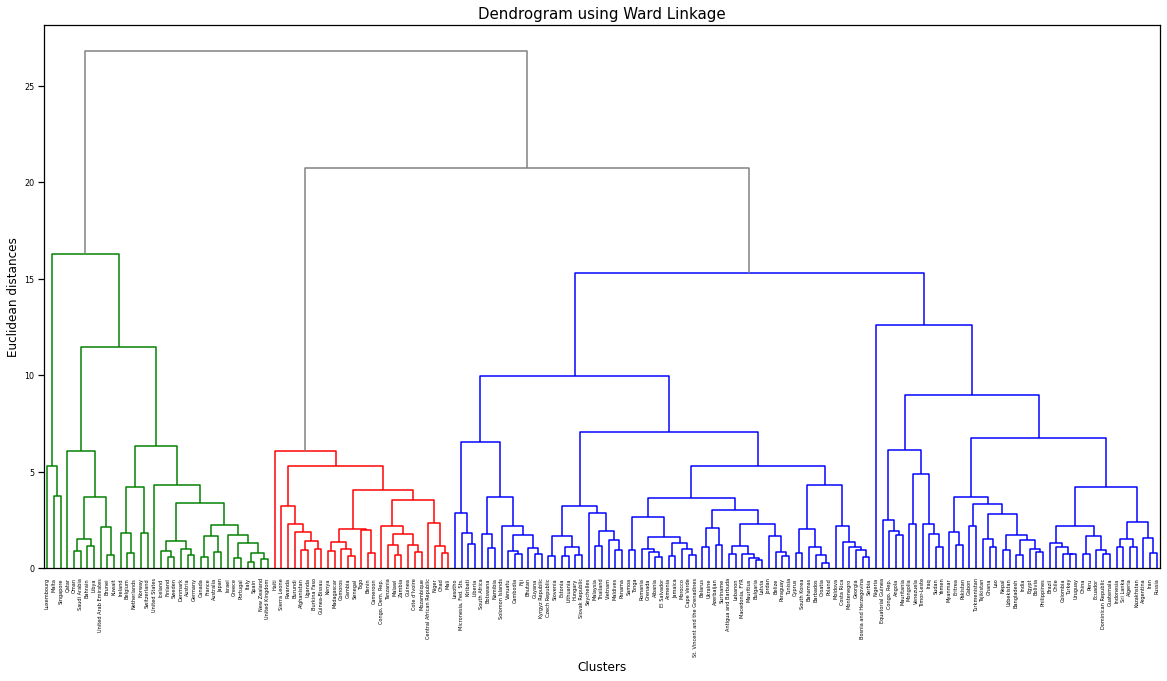

In [109]:
plt.figure(figsize=(20,10))
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False
sch.set_link_color_palette(["g", "r", "b"])
dendrogram = sch.dendrogram(sch.linkage(data1_scaled, method='ward'), 
                            labels = data1_scaled.index, above_threshold_color="grey")
plt.tick_params(axis='y', which='major', labelsize=8)
plt.title("Dendrogram using Ward Linkage", fontsize=15)
plt.xlabel('Clusters', fontsize=12)
plt.ylabel('Euclidean distances', fontsize=12)
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['axes.grid'] = False
plt.show()

In [51]:
ag_clusters = ag.labels_
colormap = np.array(['g', 'b', 'r'])

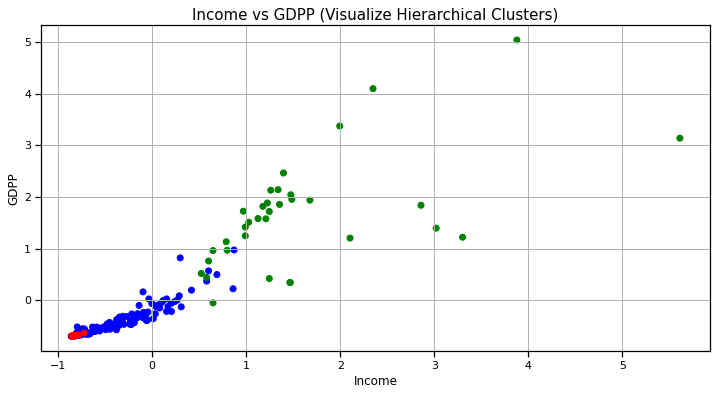

In [52]:
plt.rcParams['axes.grid'] = True
plt.figure(figsize=(12,6))
plt.rcParams['axes.facecolor'] = 'white'
plt.scatter(data1_scaled['income'], data1_scaled['gdpp'], c=colormap[ag_clusters]) 
plt.title('Income vs GDPP (Visualize Hierarchical Clusters)', fontsize=15)
plt.xlabel("Income", fontsize=12)
plt.ylabel("GDPP", fontsize=12)
plt.rcParams['axes.grid'] = True
plt.show()

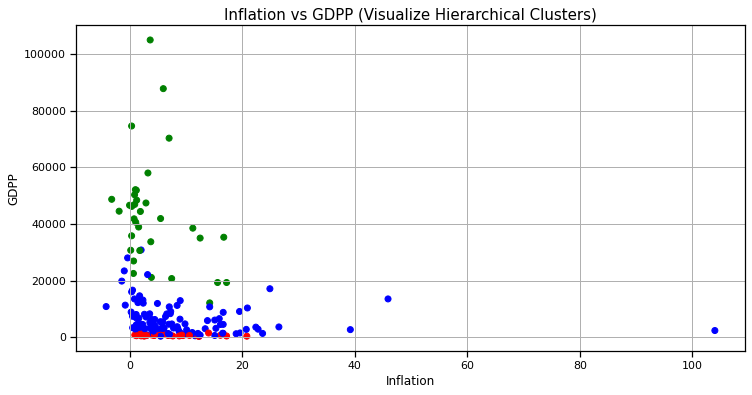

In [53]:
#Visualize clusters: Random Feature Pair-2 (inflation vs gdpp)
plt.figure(figsize=(12,6))
plt.scatter(data1['inflation'],data1['gdpp'],c=colormap[ag_clusters]) 
plt.title('Inflation vs GDPP (Visualize Hierarchical Clusters)', fontsize=15)
plt.xlabel("Inflation", fontsize=12)
plt.ylabel("GDPP", fontsize=12)
plt.rcParams['axes.facecolor'] = 'seagreen'
plt.show()

# 4. DBSCAN

In [54]:
from sklearn.cluster import DBSCAN
import sklearn.utils

In [55]:
data1_scaled.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
country,,,,,,,,,
Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180
Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623
Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376
Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268
Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817


In [58]:
# Compute DBSCAN
db = DBSCAN(eps=1, min_samples=3).fit(data1_scaled)
db_clusters = db.labels_
data_final['DBSCAN_cl'] = db_clusters

# number of labels
print("Clusters numbers: ", set(db_clusters))

Clusters numbers:  {0, 1, 2, 3, 4, 5, -1}


In [59]:
db_clusters

array([ 0,  1, -1, -1,  1, -1,  1,  2,  2, -1,  1, -1, -1,  1, -1, -1,  1,
        3,  1,  1,  1, -1,  1, -1,  1,  3, -1,  1,  3,  2,  1, -1,  5,  1,
        1,  1,  4, -1, -1,  1,  0,  1,  1,  1,  2,  1,  1,  1,  1, -1, -1,
        1,  1,  2,  2, -1,  4,  1,  2, -1,  2,  1,  1,  0,  3,  1, -1,  1,
        2, -1, -1,  1, -1, -1, -1,  2,  1,  2, -1, -1,  4, -1, -1,  1, -1,
        1,  1, -1, -1, -1,  1, -1,  1,  4,  0, -1,  1,  5, -1, -1,  1, -1,
       -1, -1,  1,  1,  0, -1, -1, -1, -1,  2,  5, -1, -1, -1, -1,  1,  1,
        1,  1,  1,  2, -1,  1,  1, -1, -1, -1,  4,  1, -1, -1, -1,  1,  1,
       -1, -1,  1,  2, -1,  1, -1,  1,  2, -1, -1,  0, -1, -1, -1, -1,  1,
        1, -1,  0, -1, -1,  2, -1,  1, -1,  1, -1, -1, -1,  0])

In [60]:
pd.Series(db_clusters).value_counts()

-1    72
 1    59
 2    16
 0     8
 4     5
 3     4
 5     3
dtype: int64

In [63]:
colormap = np.array(['r', 'b', 'g', 'm', 'k', 'y', 'c'])

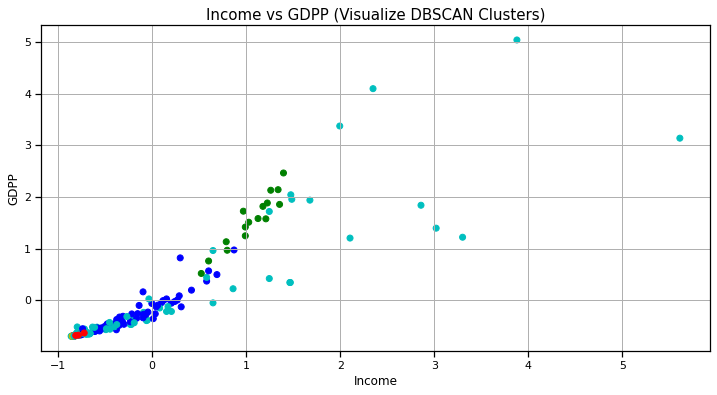

In [64]:
#Visualize clusters: Income vs GDPP
plt.figure(figsize=(12,6))
plt.rcParams['axes.facecolor'] = 'white'
plt.scatter(data1_scaled['income'], data1_scaled['gdpp'], c=colormap[db_clusters]) 
plt.title('Income vs GDPP (Visualize DBSCAN Clusters)', fontsize=15)
plt.xlabel("Income", fontsize=12)
plt.ylabel("GDPP", fontsize=12)
plt.show()

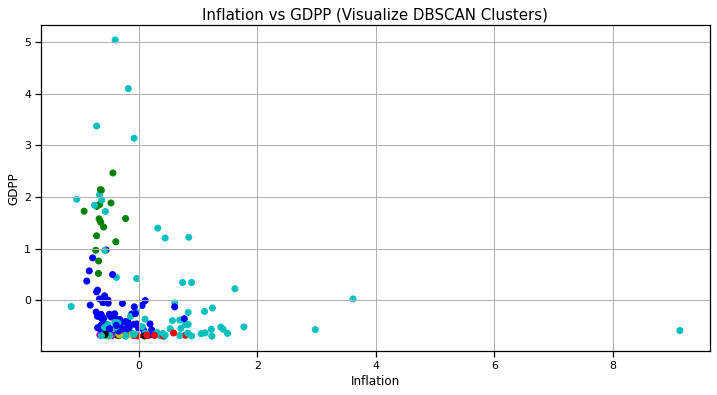

In [65]:
#Visualize clusters: Inflation vs GDPP
plt.figure(figsize=(12,6))
plt.scatter(data1_scaled['inflation'], data1_scaled['gdpp'], c=colormap[db_clusters]) 
plt.title('Inflation vs GDPP (Visualize DBSCAN Clusters)', fontsize=15)
plt.xlabel("Inflation", fontsize=12)
plt.ylabel("GDPP", fontsize=12)
plt.show()

# 5. Comparing models and final remarks

In [66]:
data_final.head()

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp,Kmeans_cl,Agglom_cl,DBSCAN_cl
country,,,,,,,,,,,,
Afghanistan,1.291532,-1.138280,0.279088,-0.082455,-0.808245,0.157336,-1.619092,1.902882,-0.679180,0,2,0
Albania,-0.538949,-0.479658,-0.097016,0.070837,-0.375369,-0.312347,0.647866,-0.859973,-0.485623,1,1,1
Algeria,-0.272833,-0.099122,-0.966073,-0.641762,-0.220844,0.789274,0.670423,-0.038404,-0.465376,1,1,-1
Angola,2.007808,0.775381,-1.448071,-0.165315,-0.585043,1.387054,-1.179234,2.128151,-0.516268,0,1,-1
Antigua and Barbuda,-0.695634,0.160668,-0.286894,0.497568,0.101732,-0.601749,0.704258,-0.541946,-0.041817,1,1,1


For each of the three clustering models, we compute the **silhouette score** using the cosine similarity as a metric.

In [80]:
from sklearn import metrics

In [98]:
metrics.silhouette_score(data1_scaled, data_final['Kmeans_cl'], metric='cosine', random_state=42)

0.3316348309222422

In [99]:
metrics.silhouette_score(data1_scaled, data_final['Agglom_cl'], metric='cosine', random_state=42)

0.1598212207712174

In [100]:
metrics.silhouette_score(data1_scaled, data_final['DBSCAN_cl'], metric='cosine', random_state=42)

-0.11609166277614917

The silhouette score ranges from 1 (best value) to -1 (worst value). Values near 0 indicate overlapping clusters. Therefore, we conclude that **K-Means** is the best among the three examined models.